Total games loaded: 1000
Number of games with ELO ratings: 1000


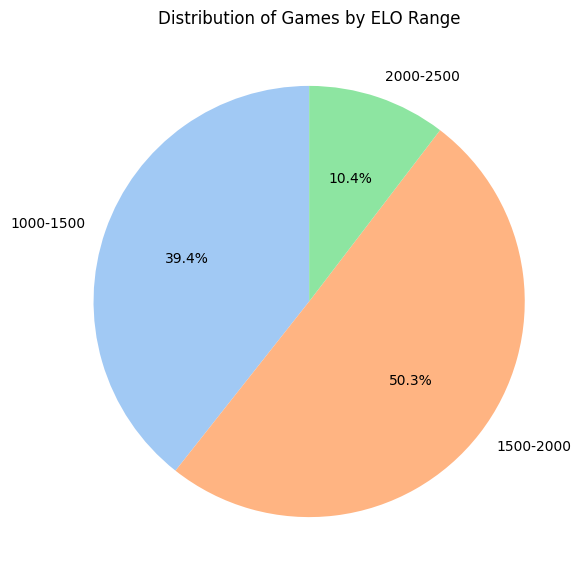

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12296\3797202174.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


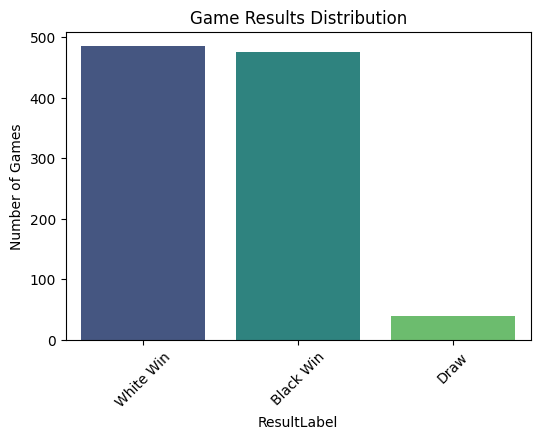

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12296\3797202174.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.values, y=top_openings.index, palette="magma")


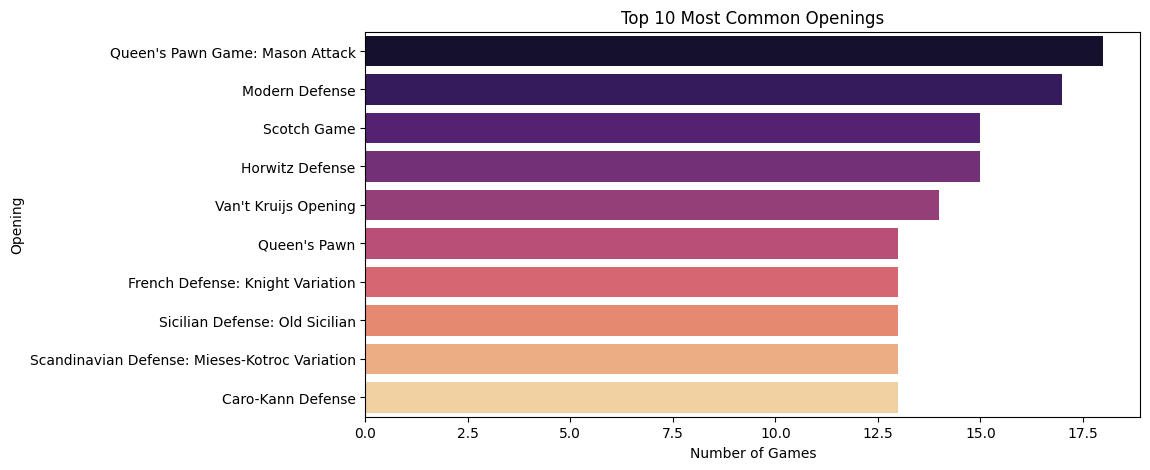

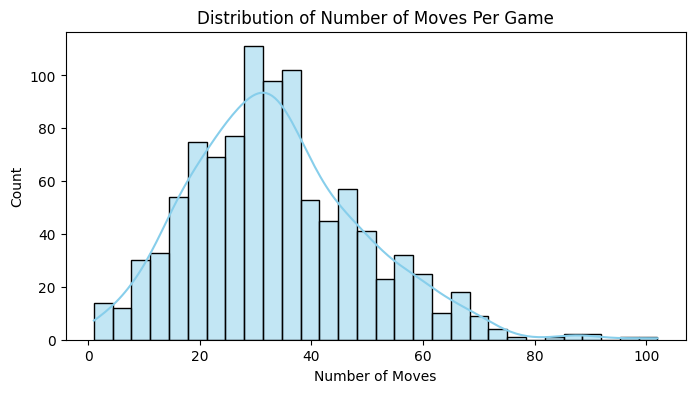

In [ ]:
import chess.pgn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

def load_pgn_games(pgn_path, max_games=None):
    games = []
    with open(pgn_path, encoding="utf-8") as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None or (max_games and len(games) >= max_games):
                break
            games.append(game)
    return games


def extract_game_data(games):
    data = []
    for game in games:
        headers = game.headers
        white_elo = (
            int(headers.get("WhiteElo", 0))
            if headers.get("WhiteElo", "0").isdigit()
            else 0
        )
        black_elo = (
            int(headers.get("BlackElo", 0))
            if headers.get("BlackElo", "0").isdigit()
            else 0
        )
        result = headers.get("Result", "*")
        opening = headers.get("Opening", "Unknown")
        num_moves = game.end().board().fullmove_number

        data.append(
            {
                "WhiteElo": white_elo,
                "BlackElo": black_elo,
                "Result": result,
                "Opening": opening,
                "NumMoves": num_moves,
            }
        )
    return pd.DataFrame(data)


def plot_elo_distribution(df):
    elo_games = df[(df["WhiteElo"] > 0) | (df["BlackElo"] > 0)]

    elo_games["AvgElo"] = (
        elo_games[["WhiteElo", "BlackElo"]].replace(0, pd.NA).mean(axis=1)
    )

    bins = [1000, 1500, 2000, 2500]
    labels = ["1000-1500", "1500-2000", "2000-2500"]

    elo_games["EloRange"] = pd.cut(
        elo_games["AvgElo"], bins=bins, labels=labels, right=False
    )
    counts = elo_games["EloRange"].value_counts().sort_index()

    plt.figure(figsize=(7, 7))
    counts.plot.pie(
        autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel")
    )
    plt.title("Distribution of Games by ELO Range")
    plt.ylabel("")
    plt.show()


def plot_results(df):
    result_map = {"1-0": "White Win", "0-1": "Black Win", "1/2-1/2": "Draw"}
    df["ResultLabel"] = df["Result"].map(result_map).fillna("Other/Unknown")
    counts = df["ResultLabel"].value_counts()

    plt.figure(figsize=(6, 4))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title("Game Results Distribution")
    plt.ylabel("Number of Games")
    plt.xticks(rotation=45)
    plt.show()


def plot_top_openings(df, top_n=10):
    top_openings = df["Opening"].value_counts().head(top_n)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_openings.values, y=top_openings.index, palette="magma")
    plt.title(f"Top {top_n} Most Common Openings")
    plt.xlabel("Number of Games")
    plt.show()


def plot_moves_distribution(df):
    plt.figure(figsize=(8, 4))
    sns.histplot(df["NumMoves"], bins=30, kde=True, color="skyblue")
    plt.title("Distribution of Number of Moves Per Game")
    plt.xlabel("Number of Moves")
    plt.ylabel("Count")
    plt.show()

pgn_path = "../data/lichess_db_standard_rated_2019-07.pgn"
games = load_pgn_games(pgn_path, max_games=1000) 

print(f"Total games loaded: {len(games)}")

df = extract_game_data(games)

elo_games_count = ((df["WhiteElo"] > 0) | (df["BlackElo"] > 0)).sum()
print(f"Number of games with ELO ratings: {elo_games_count}")

plot_elo_distribution(df)

plot_results(df)

plot_top_openings(df, top_n=10)

plot_moves_distribution(df)


In [8]:
import chess.pgn
output_path = "../data/lichess_db_standard_rated_2015-04.pgn"
with open(output_path) as f:
    game = chess.pgn.read_game(f)
    print(game.headers)
    print(game.board().san(game.next().move))


Headers(Event='Rated Blitz game', Site='https://lichess.org/2xXa7xLj', Date='????.??.??', Round='?', White='TheMagBumper', Black='hbustamantep', Result='1-0', UTCDate='2015.03.31', UTCTime='22:00:09', WhiteElo='1577', BlackElo='1383', WhiteRatingDiff='+5', BlackRatingDiff='-5', ECO='B06', Opening='Modern Defense', TimeControl='300+0', Termination='Normal')
e4
